In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'crime_data.csv' with your dataset's file name)
crime_data = pd.read_csv('crime_data.csv')

# Print column names
print(crime_data.columns)

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')


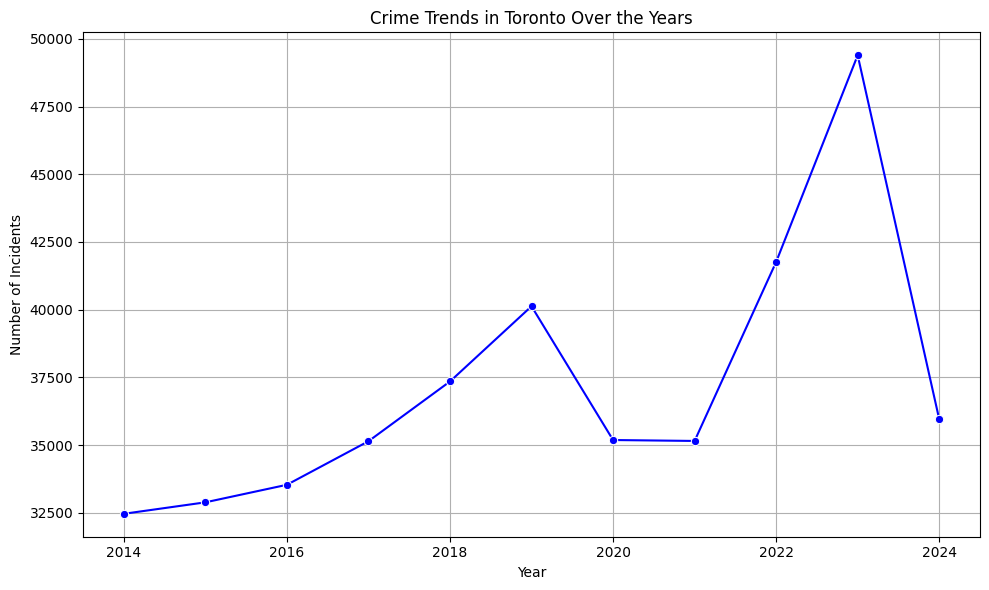

In [3]:
# Preprocessing
crime_data['REPORT_DATE'] = pd.to_datetime(crime_data['REPORT_DATE'])  # Ensure proper date format
crime_data['Year'] = crime_data['REPORT_DATE'].dt.year  # Extract the year

# Aggregate data for the time series plot
crime_trend = crime_data.groupby('Year').size().reset_index(name='Incident Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=crime_trend, x='Year', y='Incident Count', marker='o', color='b')
plt.title('Crime Trends in Toronto Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Prepare data for Tableau
# Filter relevant columns for mapping
crime_data_tableau = crime_data[['OFFENCE', 'LAT_WGS84', 'LONG_WGS84', 'NEIGHBOURHOOD_158']]

# Rename columns for better understanding in Tableau
crime_data_tableau.rename(columns={
    'OFFENCE': 'Crime Type',
    'LAT_WGS84': 'Latitude',
    'LONG_WGS84': 'Longitude',
    'NEIGHBOURHOOD_158': 'Neighborhood'
}, inplace=True)

# Save data for Tableau
crime_data_tableau.to_csv('crime_data_tableau.csv', index=False)


C:\Users\brand\AppData\Local\Temp\ipykernel_82576\2009413524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_tableau.rename(columns={
